# Esse código foi desenvolvido para uma pequena competição realizada internamente na entidade GTHC - DADOS II.
O objetivo aqui será dividir a nossa base entre o treinamento e teste, para que assim no final eu insira no kaggle ambas as bases

* Absolute Temperature (in K);
* Relative Luminosity (L/Lo);
* Relative Radius (R/Ro);
* Absolute Magnitude (Mv);
* Star Color (white,Red,Blue,Yellow,yellow-orange etc);
* Spectral Class (O,B,A,F,G,K,,M);
* Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants);
* Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun);
* Ro = 6.9551 x 10^8 m (Avg Radius of Sun).

# Importando algumas bibliotecas essenciais

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Tratando nossa base
Nesse primeiro momento irei somente criar uma coluna de ID na nossa tabela

In [ ]:
df_tudo = pd.read_csv("Stars.csv")
df_tudo

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [ ]:
#criando uma coluna de ID:

df_tudo["ID"] = np.arange(1, len(df_tudo) + 1)
df_tudo

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class,ID
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M,1
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M,2
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M,3
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M,4
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M,5
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O,236
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O,237
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A,238
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A,239


In [ ]:
df_tudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
 8   ID                       240 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 17.0+ KB


Aqui estamos decidindo qual será a variável que teremos de determinar (y) e quais serão as previsoras (x).

In [ ]:
x = df_tudo.iloc[:, [0,1,2,3,5,6,7,8]]

y = df_tudo.iloc[:, 4]

O código abaixo é crucial pois é com ele que dividimos nossa base de dados entre o treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
#Vamos concatenar "x_treinamento" com "y_treinamento", pois desse modo teremos então nossa base de treinamento completa:

Stars_treinamento = pd.concat([x_treinamento, y_treinamento], axis = 1)
Stars_treinamento

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star category,Star color,Spectral Class,ID,Star type
139,3541,0.001300,0.2560,14.330,Red Dwarf,Red,M,140,1
60,3341,0.005600,0.0570,16.230,Brown Dwarf,Red,M,61,0
204,18340,0.001340,0.0124,11.220,White Dwarf,Blue,B,205,2
186,2968,0.000461,0.1190,17.450,Brown Dwarf,Red,M,187,0
207,23092,0.001320,0.0104,10.180,White Dwarf,Blue,B,208,2
...,...,...,...,...,...,...,...,...,...
106,24630,363000.000000,63.0000,-5.830,Supergiant,Blue,O,107,4
14,2650,0.000600,0.1400,11.782,Red Dwarf,Red,M,15,1
92,4077,0.085000,0.7950,6.228,Main Sequence,yellowish,K,93,3
179,24490,248490.000000,1134.5000,-8.240,Hypergiant,Blue-white,B,180,5


In [ ]:
#Determinando nossa base de teste que será a usada no desafio da competição:

Stars_teste = x_teste.copy()
Stars_teste

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star category,Star color,Spectral Class,ID
24,16500,0.013000,0.01400,11.890,White Dwarf,Blue White,B,25
6,2637,0.000730,0.12700,17.220,Brown Dwarf,Red,M,7
93,4980,0.357000,1.13000,4.780,Main Sequence,Yellowish,K,94
109,33421,352000.000000,67.00000,-5.790,Supergiant,Blue,O,110
104,11096,112000.000000,12.00000,-5.910,Supergiant,Blue,O,105
172,4287,630000.000000,1315.00000,-9.200,Hypergiant,Orange,K,173
233,27739,849420.000000,1252.00000,-7.590,Hypergiant,Blue-white,B,234
86,12010,0.000780,0.00920,12.130,White Dwarf,Blue White,B,87
9,2700,0.000180,0.13000,16.050,Brown Dwarf,Red,M,10
143,14520,0.000820,0.00972,11.920,White Dwarf,Blue White,B,144


## Aqui estamos tratando nossa base com as respostas finais, pois será essa a base que passaremos para o kaggle como sendo as respostas finais

In [ ]:
Stars_final = pd.concat([x_teste, y_teste], axis = 1)
Stars_final

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star category,Star color,Spectral Class,ID,Star type
24,16500,0.013000,0.01400,11.890,White Dwarf,Blue White,B,25,2
6,2637,0.000730,0.12700,17.220,Brown Dwarf,Red,M,7,0
93,4980,0.357000,1.13000,4.780,Main Sequence,Yellowish,K,94,3
109,33421,352000.000000,67.00000,-5.790,Supergiant,Blue,O,110,4
104,11096,112000.000000,12.00000,-5.910,Supergiant,Blue,O,105,4
172,4287,630000.000000,1315.00000,-9.200,Hypergiant,Orange,K,173,5
233,27739,849420.000000,1252.00000,-7.590,Hypergiant,Blue-white,B,234,5
86,12010,0.000780,0.00920,12.130,White Dwarf,Blue White,B,87,2
9,2700,0.000180,0.13000,16.050,Brown Dwarf,Red,M,10,0
143,14520,0.000820,0.00972,11.920,White Dwarf,Blue White,B,144,2


In [ ]:
Stars_final = Stars_final.drop(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)', 'Star category', 'Star color', 'Spectral Class'], axis=1)
Stars_final

,ID,Star type
24,25,2
6,7,0
93,94,3
109,110,4
104,105,4
172,173,5
233,234,5
86,87,2
9,10,0
143,144,2


In [ ]:
#Transformando as bases em csv:

Stars_treinamento.to_csv("Stars_treinamento.csv", index = False)
Stars_teste.to_csv("Stars_teste.csv", index = False)
Stars_final.to_csv("Stars_final.csv", index = False)

In [ ]:
df_tudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
 8   ID                       240 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 17.0+ KB


# Testando a acurácia
Para realmente ver se essa é uma competição possível de ser realizada irei testar um modelo simples de ML para ver qual a acurácia alcançada.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
df_tudo['Star category'] = le_cat.fit_transform(df_tudo['Star category'])

le_color = LabelEncoder()
df_tudo['Star color'] = le_color.fit_transform(df_tudo['Star color'])

le_class = LabelEncoder()
df_tudo['Spectral Class'] = le_class.fit_transform(df_tudo['Spectral Class'])

In [ ]:
x = df_tudo.iloc[:, [0,1,2,3,5,6,7]]

y = df_tudo.iloc[:, 4]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
best_params = {}

In [ ]:
parametros_rf = {
    'n_estimators': [30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 30, None],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 5],
    'random_state': [42]
}




grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf, cv = 5)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['RF'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 42}
0.9958333333333332


In [ ]:
model_classes = {
    'RF': RandomForestClassifier
}

# Função que inicializa os modelos com os melhores parâmetros
def create_models(best_params, model_classes):
    models = {}
    for name, cls in model_classes.items():
        params = best_params.get(name, {})  # usa {} se não tiver params
        models[name] = cls(**params)
    return models

# Criando os modelos
modelos_otimizados = create_models(best_params, model_classes)

In [ ]:
RF = modelos_otimizados['RF']

RF.fit(x_treinamento, y_treinamento)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, n_estimators=30, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
previsoes = RF.predict(x_teste)
accuracy_score(y_teste, previsoes)

1.0

1.0

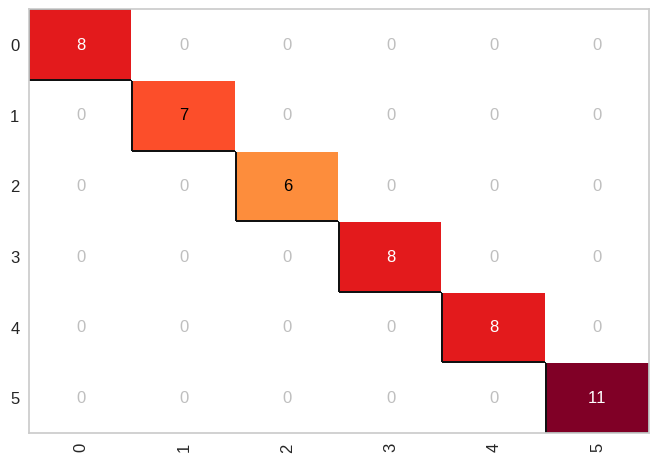

In [ ]:
cm = ConfusionMatrix(RF)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

#Conclusão
Com um modelo relativamente simples foi possível alcançar um alto índice de acurácia, o que é ótimo visto que não quero passar uma competição muito complicada nesse primeiro momento.